# Set-up

In [2]:
!R RHOME

/bin/bash: R: command not found


In [3]:
# set R HOME path 
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources'

# 1. rpy2

In [8]:
import rpy2
rpy2.__version__

'3.3.5'

## 1.1 R magics

In [5]:
%load_ext rpy2.ipython

### Run r line return python

In [73]:
%R 1 + 1

array([2.])

### Run r cell return r

In [6]:
%%R
1 + 1

[1] 2


R[write to console]: `geom_smooth()` using formula 'y ~ x'



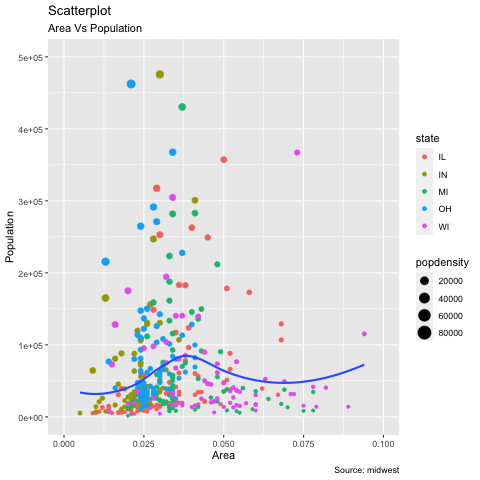

In [42]:
%%R
data("midwest", package = "ggplot2")

gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)

### Pull from r to python

In [61]:
%%R 
v = c(1,2,3)

In [62]:
%Rpull v

In [65]:
list(v)

[1.0, 2.0, 3.0]

In [82]:
%%R
n = c(2, 3, 5) 
s = c("aa", "bb", "cc") 
b = c(TRUE, FALSE, TRUE) 
df = data.frame(n, s, b)
df

  n  s     b
1 2 aa  TRUE
2 3 bb FALSE
3 5 cc  TRUE


In [83]:
%Rpull df

In [85]:
import pandas as pd
pd.DataFrame(df).T

,0,1,2
0,2,aa,True
1,3,bb,False
2,5,cc,True


### Push from python to r

In [70]:
import numpy as np
x = np.array([1,2,3])
x

array([1, 2, 3])

In [71]:
%Rpush x

In [74]:
%%R 
mean(x)

[1] 2


## 1.2 Install and import r packages

In [ ]:
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('ggplot2')
utils.chooseCRANmirror(ind = 1)

In [13]:
importr('ggplot2')
importr('dplyr')

rpy2.robjects.packages.Package as a <module 'dplyr'>

## 1.3 r objects and vectors

In [21]:
ro = rpy2.robjects.r['pi']
ro

3.141593


In [23]:
res = rpy2.robjects.StrVector(['abc','def'])
res

'abc','def'


## 1.4 Call r functions

In [26]:
rsum = rpy2.robjects.r['sum']
rsum(rpy2.robjects.IntVector([1,2,3]))[0]

6

## 1.5 Plots

In [35]:
from rpy2 import robjects
from rpy2.robjects import Formula, Environment
from rpy2.robjects.vectors import IntVector, FloatVector
from rpy2.robjects.lib import grid
from rpy2.robjects.packages import importr, data
from rpy2.rinterface_lib.embedded import RRuntimeError
import warnings

# The R 'print' function
rprint = robjects.globalenv.find("print")
stats = importr('stats')
grdevices = importr('grDevices')
base = importr('base')
datasets = importr('datasets')

grid.activate()

In [36]:
import math, datetime
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')

mtcars = data(datasets).fetch('mtcars')['mtcars']

pp = (ggplot2.ggplot(mtcars) +
      ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') +
      ggplot2.geom_point())
pp.plot()